In [3]:
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import difflib

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

# B3.1 Principle ONE SHOT

## Notebook to evaluate GPT-annotate results

Codebooks:
- B3.0: zero shot
- B3.1: one shot
- B3.0.1: zero shot with specific inclusion of context
- B3.1.1: one shot with specific inclusion of context

Test for 5 different seeds [3644,3441, 280, 5991, 7917]
> Refer to these as S1-5

Batch of 20 sentences
1 Iteration.

Main outcomes: T0 - I1
For testing purposes: (T 0.6 I1 - T 0 I3)

FINGERPRINT USED: fp_319be4768e


In [8]:
# Basic stats of train dataset:
HLS_train = pd.read_csv('data/string/HLS_train_string.csv')

In [10]:
HLS_train['PRINCIPLE'].value_counts()

not evaluated                  992
prioritarian                    66
utilitarian                     59
egalitarian                     52
general normative statement     34
sufficientarian                  8
libertarian                      1
Name: PRINCIPLE, dtype: int64

# 1. Results B3.0

### 1. Import Results
Results created under the same fingerprint are saved in a CSV file for each seed. All results are combined into one dataset.

In [4]:
#B1.0
path_B3 = 'STRING_RESULT/B3.1/all_iterations'

# Open all dataframes
S1 = pd.read_csv(f'{path_B3}/all_iterations_string_T0_3644.csv')
S2 = pd.read_csv(f'{path_B3}/all_iterations_string_T0_3441.csv')
S3 = pd.read_csv(f'{path_B3}/all_iterations_string_T0_280.csv')
S4 = pd.read_csv(f'{path_B3}/all_iterations_string_T0_5991.csv')
S5 = pd.read_csv(f'{path_B3}/all_iterations_string_T0_7917.csv')

seeds_B3 = {
    "S1": [S1],
    "S2": [S2],
    "S3": [S3],
    "S4": [S4],
    "S5": [S5]
}

### 2. Evaluate missed batches

In [5]:
# Evaluate missed batches
B3_missed = pd.read_csv('STRING_RESULT/B3.1/T0_missed_batches.csv')
B3_missed

,Unnamed: 0,Missed batch
0,0,3441 - I1 - B18
1,1,280 - I1 - B22
2,2,7917 - I1 - B13
3,3,7917 - I1 - B55
4,4,3644 - I1 - B5
5,5,5991 - I1 - B52


Evaluate missed batches

## 2. Evaluate metrics
Evaluation is performed with SKLEARN - presenting 5 classification reports

Column RELEVANCE_x is the ground truth label - RELEVANCE_y is the predicted label

Save as dataframes - if neccessary

In [6]:
print(classification_report(S1['PRINCIPLE_x'],S1['PRINCIPLE_y']))

                             precision    recall  f1-score   support

                egalitarian       0.43      0.62      0.50        52
general normative statement       0.12      0.79      0.20        34
                libertarian       0.20      1.00      0.33         1
              not evaluated       0.99      0.65      0.79       976
               prioritarian       0.39      0.68      0.49        65
            sufficientarian       0.45      0.71      0.56         7
                utilitarian       0.27      0.53      0.36        57

                   accuracy                           0.65      1192
                  macro avg       0.41      0.71      0.46      1192
               weighted avg       0.87      0.65      0.72      1192



In [7]:
print(classification_report(S2['PRINCIPLE_x'],S2['PRINCIPLE_y']))

                             precision    recall  f1-score   support

                egalitarian       0.44      0.60      0.50        52
general normative statement       0.10      0.76      0.18        34
                libertarian       0.20      1.00      0.33         1
              not evaluated       0.99      0.64      0.78       992
               prioritarian       0.39      0.67      0.49        66
            sufficientarian       0.46      0.75      0.57         8
                utilitarian       0.29      0.54      0.38        59

                   accuracy                           0.64      1212
                  macro avg       0.41      0.71      0.46      1212
               weighted avg       0.87      0.64      0.71      1212



In [8]:
print(classification_report(S3['PRINCIPLE_x'],S3['PRINCIPLE_y']))

                             precision    recall  f1-score   support

                egalitarian       0.42      0.62      0.50        52
general normative statement       0.11      0.74      0.18        34
                libertarian       0.20      1.00      0.33         1
              not evaluated       0.99      0.65      0.79       992
               prioritarian       0.38      0.62      0.47        66
            sufficientarian       0.46      0.75      0.57         8
                utilitarian       0.29      0.58      0.39        59

                   accuracy                           0.65      1212
                  macro avg       0.41      0.71      0.46      1212
               weighted avg       0.87      0.65      0.72      1212



In [9]:
print(classification_report(S4['PRINCIPLE_x'],S4['PRINCIPLE_y']))

                                        precision    recall  f1-score   support

                PRINCIPLE: egalitarian       0.00      0.00      0.00         0
PRINCIPLE: general normative statement       0.00      0.00      0.00         0
              PRINCIPLE: not evaluated       0.00      0.00      0.00         0
                           egalitarian       0.39      0.58      0.47        52
           general normative statement       0.11      0.76      0.19        34
                           libertarian       0.25      1.00      0.40         1
                         not evaluated       0.99      0.64      0.78       973
                          prioritarian       0.36      0.59      0.45        66
                       sufficientarian       0.42      0.62      0.50         8
                           utilitarian       0.30      0.55      0.39        58

                              accuracy                           0.64      1192
                             macro avg

C:\App\Python\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\App\Python\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\App\Python\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


This batch has something wrong with saving results

In [10]:
print(classification_report(S5['PRINCIPLE_x'],S5['PRINCIPLE_y']))

                             precision    recall  f1-score   support

                egalitarian       0.39      0.56      0.46        52
general normative statement       0.10      0.74      0.18        34
                libertarian       0.25      1.00      0.40         1
              not evaluated       0.99      0.65      0.78       992
               prioritarian       0.37      0.62      0.47        66
            sufficientarian       0.50      0.75      0.60         8
                utilitarian       0.29      0.54      0.37        59

                   accuracy                           0.64      1212
                  macro avg       0.41      0.69      0.47      1212
               weighted avg       0.87      0.64      0.71      1212



Metrics over 5 seeds are very similar.
Macro avg: average of all classes (aka labels)
Weighted avg: weighted average, taking class balances into account.

## 3. Confusion matrix
Evaluate where misclassifications are found - Again for each seed. - account for wrong saves for seed 4

ValueError: The number of FixedLocator locations (10), usually from a call to set_ticks, does not match the number of labels (7).

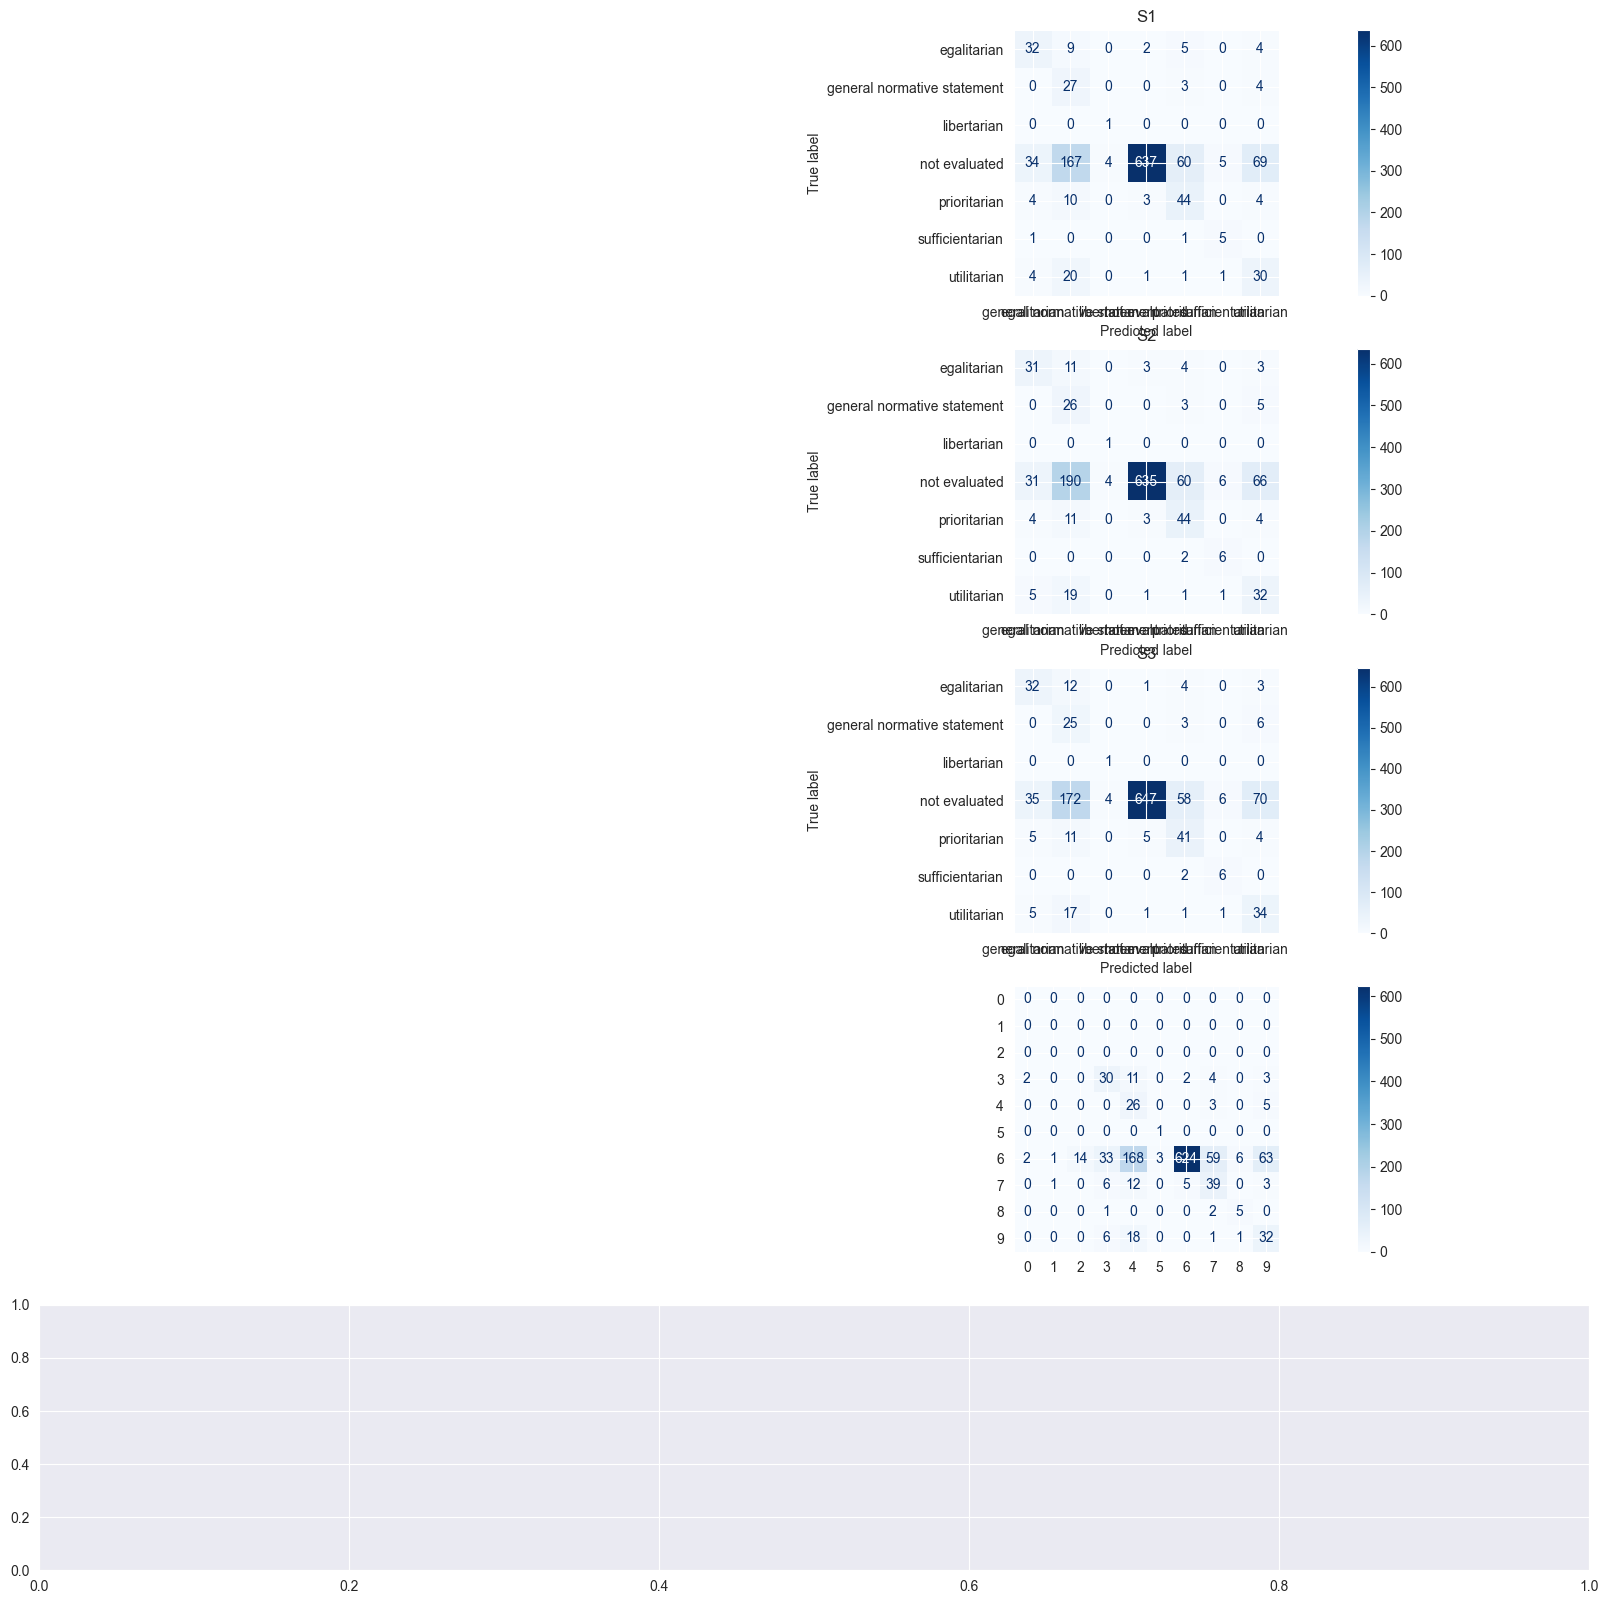

In [12]:
labels = ['egalitarian', 'general normative statement', 'libertarian','not evaluated',
          'prioritarian', 'sufficientarian', 'utilitarian']
# Number of plots
num_plots = len(seeds_B3)
# Create plot names
plot_names = list(seeds_B3.keys())

# Create subplots
fig, axes = plt.subplots(num_plots, 1, figsize=(20, 20))

# Visualize the confusion matrix
for i, name in enumerate(plot_names):
    df = seeds_B3[name][0]  # Access the dataframe
    cm = confusion_matrix(df['PRINCIPLE_x'], df['PRINCIPLE_y'])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap=plt.cm.Blues, ax=axes[i])
    axes[i].set_title(name)

# Adjust layout
plt.tight_layout()
plt.show()

## 4. Evaluate misclassifications of sentences
Special interest in relevant sentences that are incorrectly classified. Evaluate if the same sentences are misclassified in each seed

# 2. Results B3.1.1 - zero shot with context
Only seed S1-S3 available. Others are not saved correctly

In [13]:
#B1.0
path_B311 = 'STRING_RESULT/B3.1.1/all_iterations'

# Open all dataframes
S1_311 = pd.read_csv(f'{path_B311}/all_iterations_string_T0_3644.csv')
S2_311 = pd.read_csv(f'{path_B311}/all_iterations_string_T0_3441.csv')
S3_311 = pd.read_csv(f'{path_B311}/all_iterations_string_T0_280.csv')

seeds_B311 = {
    "S1": [S1_311],
    "S2": [S2_311],
    "S3": [S3_311],
}

### 2. Evaluate missed batches

In [14]:
# Evaluate missed batches
B311_missed = pd.read_csv('STRING_RESULT/B3.1.1/T0_missed_batches.csv')
B311_missed

,Unnamed: 0,Missed batch
0,0,3441 - I1 - B18
1,1,280 - I1 - B22
2,2,7917 - I1 - B13
3,3,7917 - I1 - B55
4,4,3644 - I1 - B5
5,5,5991 - I1 - B52
6,6,3441 - I1 - B39
7,7,280 - I1 - B33
8,8,280 - I1 - B50
9,9,280 - I1 - B54


S1: 2 batches (40 sentences) missed
S2: 2 batches (40 sentences) missed
S3: 4 batches (80 sentences) missed
S4: 1 batch (20 sentences) missed
S5: 4 batches (80 sentences) missed

## 2. Evaluate metrics
Evaluation is performed with SKLEARN - presenting 5 classification reports

Column RELEVANCE_x is the ground truth label - RELEVANCE_y is the predicted label

Save as dataframes - if neccessary

In [15]:
print(classification_report(S1_311['PRINCIPLE_x'],S1_311['PRINCIPLE_y']))

                             precision    recall  f1-score   support

                egalitarian       0.36      0.61      0.45        46
general normative statement       0.09      0.59      0.16        32
                libertarian       0.25      1.00      0.40         1
              not evaluated       0.98      0.68      0.81       944
               prioritarian       0.38      0.61      0.47        64
            sufficientarian       0.38      0.75      0.50         8
                utilitarian       0.30      0.47      0.37        57

                   accuracy                           0.66      1152
                  macro avg       0.39      0.67      0.45      1152
               weighted avg       0.86      0.66      0.73      1152



In [16]:
print(classification_report(S2_311['PRINCIPLE_x'],S2_311['PRINCIPLE_y']))

                             precision    recall  f1-score   support

                egalitarian       0.33      0.55      0.41        49
general normative statement       0.10      0.59      0.16        32
                libertarian       0.25      1.00      0.40         1
              not evaluated       0.98      0.68      0.80       958
               prioritarian       0.35      0.62      0.45        65
            sufficientarian       0.38      0.75      0.50         8
                utilitarian       0.30      0.49      0.37        59

                   accuracy                           0.66      1172
                  macro avg       0.38      0.67      0.44      1172
               weighted avg       0.86      0.66      0.72      1172



In [17]:
print(classification_report(S3_311['PRINCIPLE_x'],S3_311['PRINCIPLE_y']))

                             precision    recall  f1-score   support

                egalitarian       0.72      0.63      0.67       114
general normative statement       0.15      0.80      0.25        51
                libertarian       0.25      1.00      0.40         1
              not evaluated       0.98      0.61      0.75       929
               prioritarian       0.13      0.62      0.21        32
            sufficientarian       0.33      0.67      0.44         6
                utilitarian       0.25      0.30      0.27        67

                   accuracy                           0.60      1200
                  macro avg       0.40      0.66      0.43      1200
               weighted avg       0.85      0.60      0.68      1200



Ook een fout in deze opslag, met > 100 egalitarian labels - wat niet kan kloppen